In [2]:
import os
import torch
from tqdm import tqdm
from transformers import T5ForConditionalGeneration, T5Tokenizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from datasets import load_dataset

# T5 모델과 토크나이저 불러오기
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = T5ForConditionalGeneration.from_pretrained('google/flan-t5-xl').to(device)
tokenizer = T5Tokenizer.from_pretrained('google/t5-v1_1-base')

# boolQ 데이터셋 불러오기
dataset = load_dataset('boolq')

import pandas as pd
from datasets import DatasetDict, Dataset

df = pd.DataFrame(dataset['validation'][:20])
data = Dataset.from_pandas(df, preserve_index=False)
dataset = DatasetDict({'validation':data})
dataset

# 평가에 사용할 지표 초기화
total = 0
correct = 0
predicted_labels = []
true_labels = []

# 데이터셋에 대한 반복문
for example in tqdm(dataset['validation']):
    # 예시 문장과 정답 불러오기
    context = example['passage']
    question = example['question']
    answer = example['answer']
    true_label = int(answer == 'true')

    # T5 모델 입력을 위한 전처리
    inputs = tokenizer.encode_plus(question, context, return_tensors='pt', max_length=64, truncation=True).to(device)

    # T5 모델로 문제 답변 생성
    answer_ids = model.generate(inputs['input_ids'], num_beams=5, early_stopping=True, max_length=64)
    predicted_answer = tokenizer.decode(answer_ids[0], skip_special_tokens=True)
    if predicted_answer.lower() == 'yes':
        predicted_label = 1
    elif predicted_answer.lower() == 'no':
        predicted_label = 0
    else:
        predicted_label = -1

    # 정답 여부 확인
    total += 1
    correct += int(predicted_label == true_label)
    predicted_labels.append(predicted_label)
    true_labels.append(true_label)
    print(f'question:{question}, answer:{answer}, predict:{predicted_answer.lower()}')
    print(f'pred: {predicted_label}, true: {true_label}')

# 평가 결과 출력
accuracy = accuracy_score(true_labels, predicted_labels)
# precision = precision_score(true_labels, predicted_labels)
# recall = recall_score(true_labels, predicted_labels)
# f1 = f1_score(true_labels, predicted_labels)

print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1 Score:", f1)

Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 502.00 MiB (GPU 0; 23.50 GiB total capacity; 22.71 GiB already allocated; 42.00 MiB free; 22.71 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [2]:
import os
import torch
from tqdm import tqdm
from transformers import T5ForConditionalGeneration, T5Tokenizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from datasets import load_dataset

# T5 모델과 토크나이저 불러오기
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = T5ForConditionalGeneration.from_pretrained('google/t5-v1_1-small').to(device)
tokenizer = T5Tokenizer.from_pretrained('google/t5-v1_1-base')

# boolQ 데이터셋 불러오기
dataset = load_dataset('piqa')


# 평가에 사용할 지표 초기화
total = 0
correct = 0
predicted_labels = []
true_labels = []

# 데이터셋에 대한 반복문
for example in dataset['validation']:
    # 이미지와 예시 문장, 정답 불러오기
    image_path = example['image']
    question = example['goal']
    answer = example['sol']

    # T5 모델 입력을 위한 전처리
    inputs = tokenizer.encode_plus(question, return_tensors='pt', max_length=512, truncation=True).to(device)

    # T5 모델로 문제 답변 생성
    answer_ids = model.generate(inputs['input_ids'], num_beams=4, early_stopping=True)
    predicted_answer = tokenizer.decode(answer_ids[0], skip_special_tokens=True)
    predicted_label = int(predicted_answer.lower() == answer.lower())

    # 정답 여부 확인
    total += 1
    correct += int(predicted_label == 1)
    predicted_labels.append(predicted_label)
    true_labels.append(1)

# 평가 결과 출력
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16113 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3084 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1838 [00:00<?, ? examples/s]

Dataset piqa downloaded and prepared to /home/uj-user/.cache/huggingface/datasets/piqa/plain_text/1.1.0/6c611c1a9bf220943c4174e117d3b660859665baf1d43156230116185312d011. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

KeyError: 'image'

In [4]:
import os
import torch
from tqdm import tqdm
from transformers import T5ForConditionalGeneration, T5Tokenizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from datasets import load_dataset

# T5 모델과 토크나이저 불러오기
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = T5ForConditionalGeneration.from_pretrained('google/t5-v1_1-small').to(device)
tokenizer = T5Tokenizer.from_pretrained('google/t5-v1_1-base')

# SiQA 데이터셋 불러오기
dataset = load_dataset('social_i_qa')

# 평가에 사용할 지표 초기화
total = 0
correct = 0
predicted_labels = []
true_labels = []

# 데이터셋에 대한 반복문
for example in tqdm(dataset['validation']):
    # 질문과 예시 답변, 정답 불러오기
    question = example['question']
    example_answer = example['example']
    answer = example['answer']

    # T5 모델 입력을 위한 전처리
    inputs = tokenizer.encode_plus(question + ' ' + example_answer, return_tensors='pt', max_length=512, truncation=True)

    # T5 모델로 문제 답변 생성
    answer_ids = model.generate(inputs['input_ids'], num_beams=4, early_stopping=True)
    predicted_answer = tokenizer.decode(answer_ids[0], skip_special_tokens=True)
    predicted_label = int(predicted_answer.lower() == answer.lower())

    # 정답 여부 확인
    total += 1
    correct += int(predicted_label == 1)
    predicted_labels.append(predicted_label)
    true_labels.append(1)

# 평가 결과 출력
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Generating train split:   0%|          | 0/33410 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1954 [00:00<?, ? examples/s]

Dataset social_i_qa downloaded and prepared to /home/uj-user/.cache/huggingface/datasets/social_i_qa/default/0.1.0/674d85e42ac7430d3dcd4de7007feaffcb1527c535121e09bab2803fbcc925f8. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1954 [00:00<?, ?it/s]


KeyError: 'example'

: 

The: det
cat: nsubj


The: det
dog: nsubj


The: det
bird: nsubj


The: det
dog: nsubj


The: det
bird: nsubj


The: det
fish: nsubj


The: det
fish: nsubj


The: det
book: nsubj


The: det
computer: nsubj


The: det
phone: nsubj


The: det
car: nsubjpass


The: det
tree: nsubj


The: det
sun: nsubj




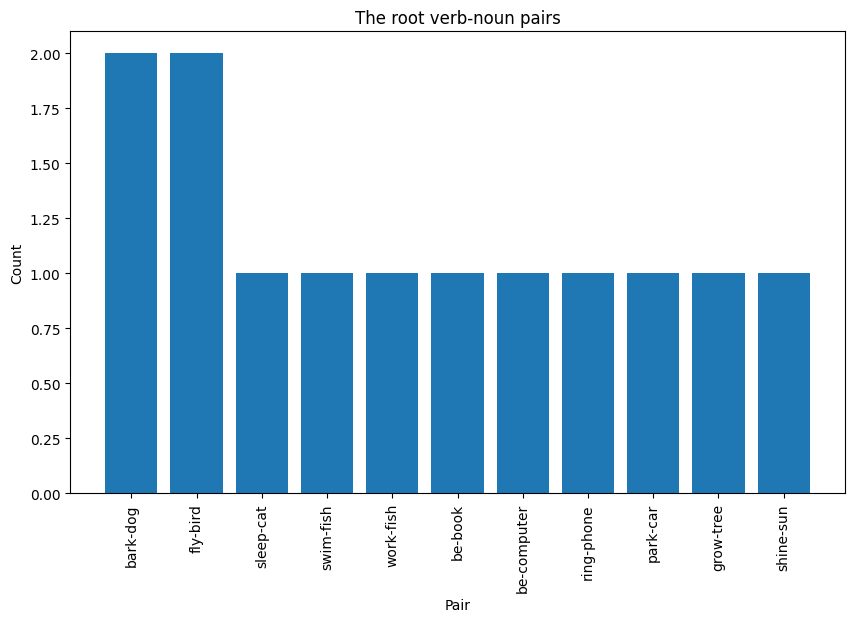

In [14]:
import spacy

nlp = spacy.load("en_core_web_sm")

def extract_root_verb_noun_pairs(sentence):
    doc = nlp(sentence)
    for token in doc:
        if token.dep_ == "ROOT":
            verb = token.lemma_
            break
    for token in doc:
        if token.dep_ == "nsubj" or token.dep_ == "nsubjpass":
            noun = token.text
            break
    return f"{verb}-{noun}"

import matplotlib.pyplot as plt

def visualize_root_verb_noun_pairs(dataset):
    root_verb_noun_pairs = {}
    for sentence in dataset:
        pair = extract_root_verb_noun_pairs(sentence)
        if pair not in root_verb_noun_pairs:
            root_verb_noun_pairs[pair] = 1
        else:
            root_verb_noun_pairs[pair] += 1

    pairs = list(root_verb_noun_pairs.keys())
    counts = list(root_verb_noun_pairs.values())
    sorted_indices = sorted(range(len(counts)), key=lambda i: counts[i], reverse=True)
    sorted_pairs = [pairs[i] for i in sorted_indices]
    sorted_counts = [counts[i] for i in sorted_indices]

    plt.figure(figsize=(10, 6))
    plt.bar(sorted_pairs, sorted_counts)
    plt.title("The root verb-noun pairs")
    plt.xticks(rotation=90)
    plt.xlabel("Pair")
    plt.ylabel("Count")
    plt.show()
    return sorted_pairs, sorted_counts

dataset = [
    "The cat is sleeping on the sofa",
    "The dog is barking at the mailman",
    "The bird is flying in the sky",
    "The dog is barking at the mailman",
    "The bird is flying in the sky",
    "The fish is swimming in the pond",
    "The fish is working in the pond",
    "The book is on the table",
    "The computer is on the desk",
    "The phone is ringing",
    "The car is parked in the garage",
    "The tree is growing in the yard",
    "The sun is shining in the sky",
]

sorted_pairs, sorted_counts = visualize_root_verb_noun_pairs(dataset)


높은 빈도수 순서대로 The root verb-noun pairs
is-ringing: 2
is-sleeping: 1
is-barking: 1
is-flying: 1
is-swimming: 1
is-on: 1
is-parked: 1
is-growing: 1
is-shining: 1


/home/uj-user/Yo/torch-venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  func(*args, **kwargs)
/home/uj-user/Yo/torch-venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
/home/uj-user/Yo/torch-venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/home/uj-user/Yo/torch-venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/uj-user/Yo/torch-venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/uj-user/Yo/torch-venv/lib/

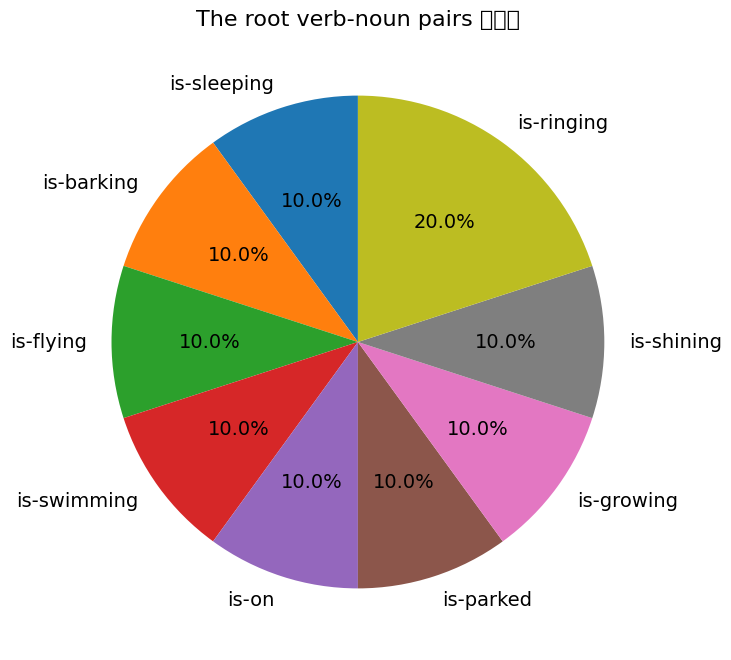

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# The root verb-noun pairs 데이터셋
data = [
    "is-sleeping",
    "is-barking",
    "is-flying",
    "is-swimming",
    "is-on",
    "is-parked",
    "is-growing",
    "is-shining",
    "is-ringing",
    "is-ringing"
]

data = sorted_pairs

# The root verb-noun pairs 빈도수 계산
counter = Counter(data)
df = pd.DataFrame.from_dict(counter, orient='index', columns=['count'])

# The root verb-noun pairs 빈도수에 따른 파이차트 생성
fig, ax = plt.subplots(figsize=(8, 8))
df.plot(kind='pie', y='count', ax=ax, autopct='%1.1f%%', startangle=90, shadow=False, legend=False, fontsize=14)

# 파이차트 제목과 축 레이블 지정
ax.set_title("The root verb-noun pairs 빈도수", fontsize=16)
ax.set_ylabel("")

# 높은 빈도수 순서대로 The root verb-noun pairs 출력
sorted_pairs = sorted(counter.items(), key=lambda x: x[1], reverse=True)
print("높은 빈도수 순서대로 The root verb-noun pairs")
for pair, count in sorted_pairs:
    print(f"{pair}: {count}")


높은 빈도수 순서대로 The root verb-noun pairs
is-ringing: 2
is-sleeping: 1
is-barking: 1
is-flying: 1
is-swimming: 1
is-on: 1
is-parked: 1
is-growing: 1
is-shining: 1


/home/uj-user/Yo/torch-venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  func(*args, **kwargs)
/home/uj-user/Yo/torch-venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
/home/uj-user/Yo/torch-venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/home/uj-user/Yo/torch-venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/uj-user/Yo/torch-venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/uj-user/Yo/torch-venv/lib/

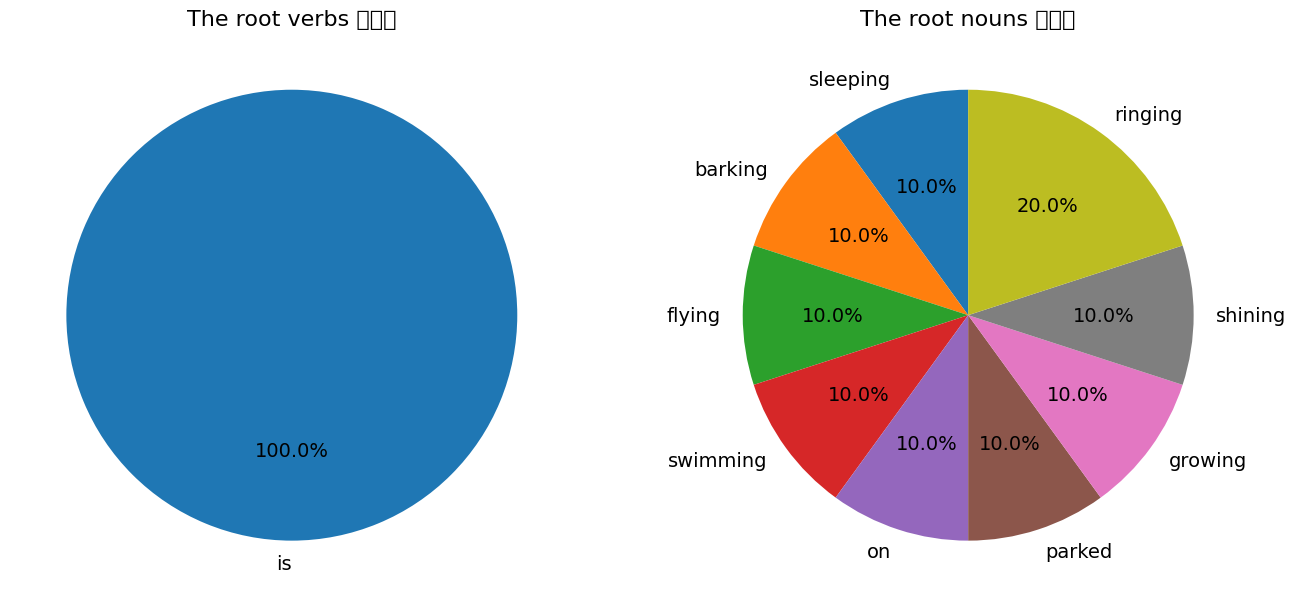

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# The root verb-noun pairs 데이터셋
data = [
    "is-sleeping",
    "is-barking",
    "is-flying",
    "is-swimming",
    "is-on",
    "is-parked",
    "is-growing",
    "is-shining",
    "is-ringing",
    "is-ringing"
]

data = sorted_pairs

# verb와 noun 분리
verb_list = [x.split("-")[0] for x in data]
noun_list = [x.split("-")[1] for x in data]

# verb와 noun 빈도수 계산
verb_counter = Counter(verb_list)
noun_counter = Counter(noun_list)
verb_df = pd.DataFrame.from_dict(verb_counter, orient='index', columns=['count'])
noun_df = pd.DataFrame.from_dict(noun_counter, orient='index', columns=['count'])

# verb 빈도수에 따른 파이차트 생성
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
verb_df.plot(kind='pie', y='count', ax=axs[0], autopct='%1.1f%%', startangle=90, shadow=False, legend=False, fontsize=14)
axs[0].set_title("The root verbs 빈도수", fontsize=16)
axs[0].set_ylabel("")

# noun 빈도수에 따른 파이차트 생성
noun_df.plot(kind='pie', y='count', ax=axs[1], autopct='%1.1f%%', startangle=90, shadow=False, legend=False, fontsize=14)
axs[1].set_title("The root nouns 빈도수", fontsize=16)
axs[1].set_ylabel("")

# 높은 빈도수 순서대로 The root verb-noun pairs 출력
counter = Counter(data)
sorted_pairs = sorted(counter.items(), key=lambda x: x[1], reverse=True)
print("높은 빈도수 순서대로 The root verb-noun pairs")
for pair, count in sorted_pairs:
    print(f"{pair}: {count}")


Output Sequence Length 최빈값: 25
Output Sequence Length 중앙값: 3.0
Output Sequence Length 평균값: 2.80


/home/uj-user/Yo/torch-venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  func(*args, **kwargs)
/home/uj-user/Yo/torch-venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
/home/uj-user/Yo/torch-venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/home/uj-user/Yo/torch-venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/uj-user/Yo/torch-venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/uj-user/Yo/torch-venv/lib/

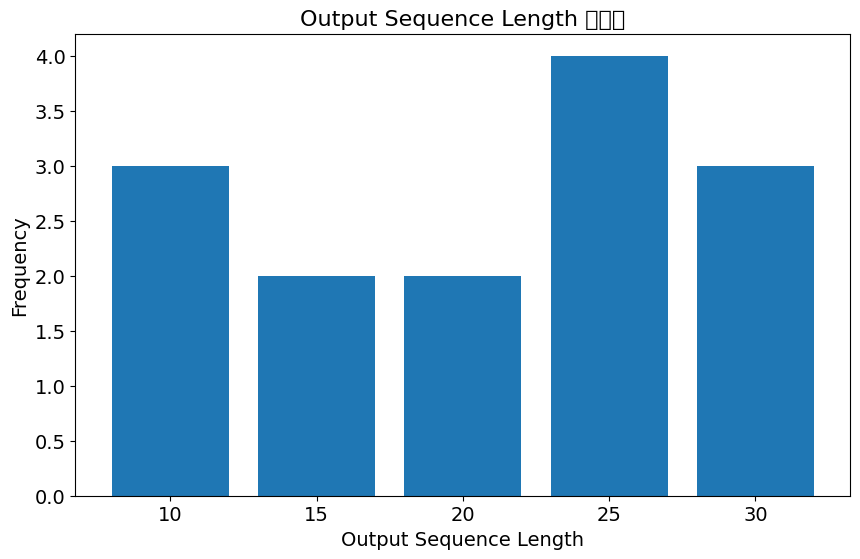

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# 모델의 출력된 문장 Output Sequence Length 데이터셋
data = [
    10,
    15,
    20,
    10,
    25,
    30,
    25,
    15,
    20,
    25,
    10,
    30,
    25,
    30
]

# Output Sequence Length 빈도수 계산
length_counter = Counter(data)
length_df = pd.DataFrame.from_dict(length_counter, orient='index', columns=['count'])
length_df = length_df.sort_index()

# Output Sequence Length 빈도수에 따른 막대그래프 생성
fig, axs = plt.subplots(figsize=(10, 6))
length_df.plot(kind='bar', y='count', ax=axs, legend=False, fontsize=14, width=0.8)
axs.set_title("Output Sequence Length 빈도수", fontsize=16)
axs.set_xlabel("Output Sequence Length", fontsize=14)
axs.set_ylabel("Frequency", fontsize=14)
plt.xticks(rotation=0)

# Output Sequence Length 최빈값, 중앙값, 평균값 출력
mode = length_df.idxmax()['count']
median = length_df.median()['count']
mean = length_df.mean()['count']
print(f"Output Sequence Length 최빈값: {mode}")
print(f"Output Sequence Length 중앙값: {median}")
print(f"Output Sequence Length 평균값: {mean:.2f}")
